In [10]:
# IMPORTING REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# LOADING DATASET
df = pd.read_csv('kidney_disease.csv')
df.head()

In [ ]:
# DISPLAYING DATA INFORMATION
df.info()

In [ ]:
# CHECKING THE SHAPE OF THE DATAFRAME
df.shape

In [ ]:
# CHECKING NULL VALUE
df.isna().sum()

In [15]:
# HANDLING MISSING VALUES
df.drop('id',axis=1,inplace=True)

In [ ]:
#DISPLAY DATAFRAME AFTER DROP THE ID COLUMN
df.head()

In [ ]:
# DISPLAYING STATISTICAL SUMMARY
df.describe()

In [18]:
# CHANGING THE COLUMN NAMES
df.columns =['age','blood pressure','specific_gravity','albumin','sugar','red_blood_cell','pus_cell','pus_cell_clumps','bacteria','blood_gulcose_random',
             'blood_urea','serum_creatine','sodium','pottasium','haemoglobin','packed_cell_volume','white_blood_count','red_blood_count',
             'hypertension','diabetes_mellitus','coronary_arbitery','appetite','peda_edema','anemia','class']

In [ ]:
# DISPLAYING DATA INFORMATION
df.head(5)

In [ ]:
# DISPLAY THE DATATYPE
text_columns =['packed_cell_volume','white_blood_count','red_blood_count']
for i in text_columns:
    print(f'{i}:{df[i].dtype}')
    

In [21]:
# CONVERT THE DATATYPE
def convert_text_to_numeric(df,column):
    df[column] =pd.to_numeric(df[column],errors='coerce')
    

In [ ]:
# AFTER CONVERTING CHECKING DATAFRAME
for column in text_columns:
        convert_text_to_numeric(df,column)
        print(f'{column}: {df[column].dtype}')
    

In [ ]:
# CHECKING THE MISSING VALUE
missing = df.isna().sum()
missing[missing>0].sort_values(ascending=False).head(20)
                                                     

In [24]:
# FILLING NULL WITH MEAN
def mean_value_imputation(df,column):
    mean_value =df[column].mean()
    df[column].fillna(value =mean_value,inplace =True)

In [25]:
# FILLING NULL WITH MODE
def mode_value_imputation(df,column):
    mode_value =df[column].mode()[0]
    df[column].fillna(value =mode_value,inplace =True)
    

In [ ]:
# CHECK THE COLUMNS NAME
df.columns

In [ ]:
num_cols = [col for col in df.columns if df[col].dtype!='object']
for col_name in num_cols:
    mean_value_imputation(df,col_name)

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype=='object']
for col_name in cat_cols:
    mode_value_imputation(df,col_name)

In [ ]:
#AGAIN CHECK THE NULL VALUE AFTER FILLING
missing = df.isna().sum()
missing[missing>0].sort_values(ascending=False)

In [ ]:
# DISPLAYING DATA INFORMATION
df.head(20)

In [ ]:
# CHECK UNIQUE DATA
print(f"diabetes_mellitus:{df['diabetes_mellitus'].unique()}")
print(f"coronary_arbitery:{df['coronary_arbitery'].unique()}")
print(f"class:{df['class'].unique()}")

In [32]:
#CLEAN THE UNIQUE DATA VALUES
df['diabetes_mellitus'] =df['diabetes_mellitus'].replace(to_replace={' yes':'yes','\tno':'no','\tyes':'yes'})
df['coronary_arbitery'] =df['coronary_arbitery'].replace(to_replace={'\tno':'no'})
df['class'] =df['class'].replace(to_replace={'ckd\t':'ckd','notckd':'not ckd'})



In [ ]:
# AFTER CLEANING AGAIN CHECK THE UNIQUE DATA
print(f"diabetes_mellitus:{df['diabetes_mellitus'].unique()}")
print(f"coronary_arbitery:{df['coronary_arbitery'].unique()}")
print(f"class:{df['class'].unique()}")

In [34]:
#MAPPING TGE CATEGORICAL DATA TO NUMERIC
df['class'] = df['class'].map({'ckd': 1, 'not ckd': 0})
df['red_blood_cell'] = df['red_blood_cell'].map({'normal': 1, 'abnormal': 0})
df['pus_cell'] = df['pus_cell'].map({'normal': 1, 'abnormal': 0})
df['pus_cell_clumps'] = df['pus_cell_clumps'].map({'present': 1, 'notpresent': 0})
df['bacteria'] = df['bacteria'].map({'present': 1, 'notpresent': 0})
df['hypertension'] = df['hypertension'].map({'yes': 1, 'no': 0})
df['diabetes_mellitus'] = df['diabetes_mellitus'].map({'yes': 1, 'no': 0})
df['coronary_arbitery'] = df['coronary_arbitery'].map({'yes': 1, 'no' : 0})
df['appetite'] = df['appetite'].map({'good': 1, 'poor': 0})
df['peda_edema'] = df['peda_edema'].map({'yes': 1, 'no': 0})
df['anemia'] = df['anemia'].map({'yes': 1, 'no': 0})

In [ ]:
# DISPLAYING DATA INFORMATION
df.head(10)

In [ ]:
# CHECK THE CORRELATION OF THE DATAFRAME
df.corr()

In [ ]:
# INSTALLING SEABORN FOR DATA VISUALIZATION
pip install seaborn

In [38]:
# IMPORTING REQUIRED LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns


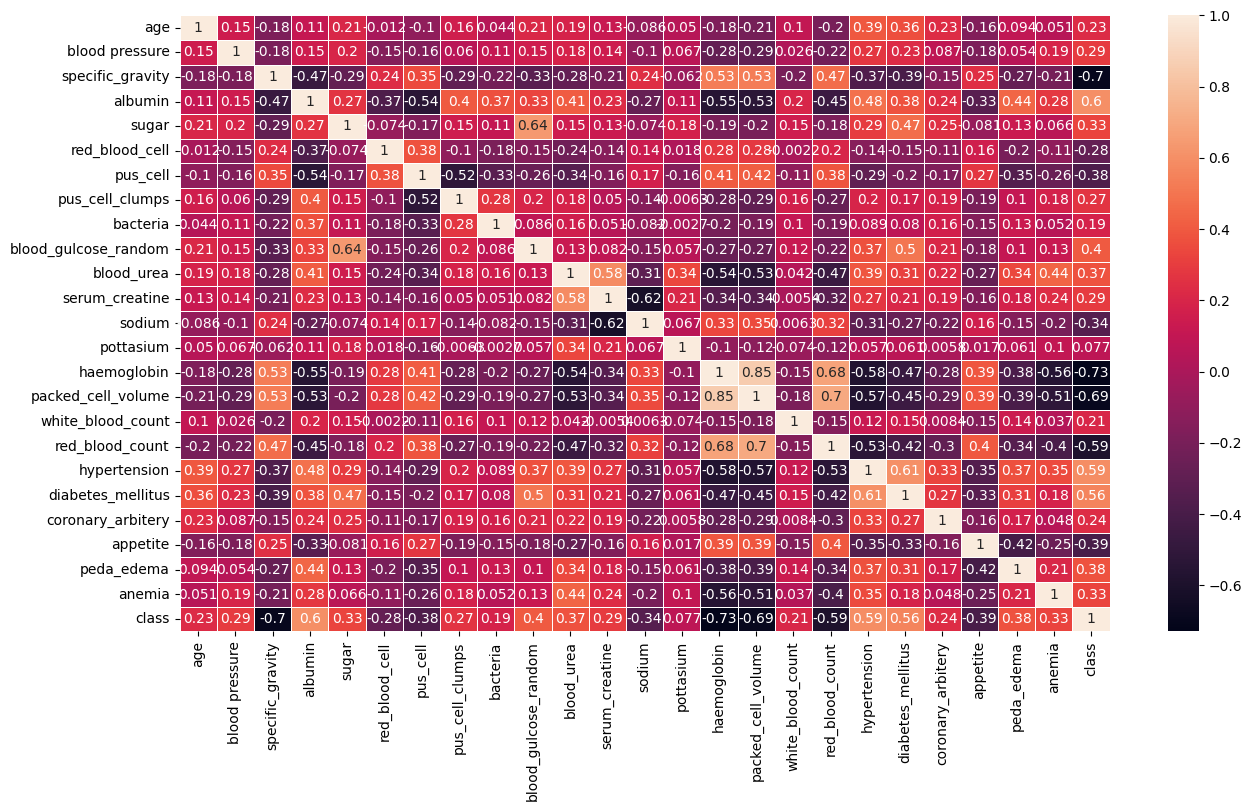

In [39]:
#DISPLAY THE CORRELATION USING CMAP
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.5)
plt.show()

In [ ]:

df.corr()['class'].abs().sort_values(ascending=False)[1:]

In [ ]:
# CHECK THE VALUE COUNT
df['class'].value_counts()

In [42]:
# HANDLING MISSING VALUES
x = df.drop('class',axis =1)
y = df['class']

In [43]:
# IMPORTING REQUIRED LIBRARIES
from sklearn.model_selection import train_test_split

In [44]:
# SPLITTING DATA INTO TRAINING AND TEST SETS
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.25,random_state=25)

In [45]:
#CHECK THE COUNT OF TRAINING DATA ALLOCATED
a =len(x_train)
a

300

In [ ]:
#DISPLAY THE SHAPE OF TRAIN AND TEST DATA
print(f" 'x' shape: {x_train.shape}")
print(f" 'x_test' shape: {x_test.shape}")

In [53]:
# IMPORTING REQUIRED LIBRARIES
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [48]:
# TRAINING DECISION TREE CLASSIFIER
dct =DecisionTreeClassifier()
dct.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
# MAKING PREDICTIONS USING MODEL
y_predict =dct.predict(x_test)
y_predict

In [ ]:
# MAKING PREDICTIONS USING MODEL
lenth =len(y_predict)
lenth

In [51]:
# IMPORTING REQUIRED LIBRARIES
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score

In [ ]:
# MAKING EVALUATION USING MODEL
print(confusion_matrix(y_test,y_predict))
print(precision_score(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

In [ ]:
# TRAINING RANDOM FOREST CLASSIFIER
rf =RandomForestClassifier()
rf.fit(x_train,y_train)

In [ ]:
# MAKING PREDICTIONS USING Rf MODEL
y1_predict =rf.predict(x_test)
y1_predict

In [ ]:
# MAKING EVALUATION USING MODEL
print(confusion_matrix(y_test,y1_predict))
print(precision_score(y_test,y1_predict))
print(accuracy_score(y_test,y1_predict))